In [1]:
# Source: https://medium.com/@kirthi.tej92/animations-using-python-a-comprehensive-guide-7d0e075e5c6e
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

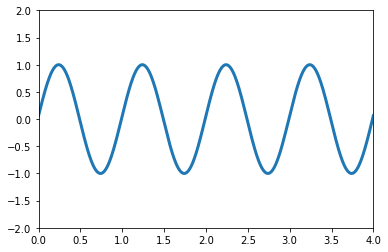

In [11]:
fig = plt.figure()
ax = plt.axes(xlim=(0,4), ylim=(-2,2))
line, = ax.plot([], [], lw=3)

# define functions
def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 500)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# define animation object
anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=10, blit=True)
# initiate writers
FFMpegWriter = animation.writers['ffmpeg']
writer = animation.FFMpegWriter()

#saving animation
anim.save("sinewave.mp4", writer=writer)

In [12]:
!open sinewave.mp4